**This note book is the tutorial for cell type annotation** 

Here we use package "scCATCH" under R 4.0 environment.

The running of scCATCH uses the Seurat package with input of Seurat Object.

In [6]:
library(Seurat)
library(scCATCH)

**Install Packages**

\# Package "Seurat" >= v3.0 is required

In [ ]:
# install.packages(pkgs = 'devtools')
# devtools::install_github('ZJUFanLab/scCATCH')

**Loading Query Object**

Remember to change the "query_dir" to your directory.

In [7]:
query_dir <- "/stor/public/hcad/heart_heart_HCLAdultHeart1/heart_heart_HCLAdultHeart1_expression.tsv.gz"
query_data <- read.table(query_dir, header=TRUE, row.names=1)

**Building Seurat Object and Run Pre-processing**

We need to input scCATCH a Seurat object with normalization and log1p(default in Seurat3). 

Clustering is also required. "resolution" is an important tunning parameter.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  FTL, FTH1, CTSB, C1QB, CD74, C5AR1, GPR183, CD83, TMSB4X, C1QA 
	   PLAUR, LYZ, CXCL8, SOD2, CCL3L3, CXCL3, CCL3, IL1B, IER3, NFKBIA 
	   LIPA, BCL2A1, SRGN, IL1RN, C1QC, CYBB, CXCL2, AIF1, MAFB, INSIG1 
Negative:  ADIRF, TAGLN, MYL9, ACTA2, MGP, DSTN, TPM2, DCN, APOD, MT2A 
	   TIMP3, PLA2G2A, CLU, LUM, RGS16, NDUFA4L2, C7, MFAP4, GPX3, RGS5 
	   MYL6, CSRP2, PPP1R14A, RERGL, MT1E, IFI27, C1R, TM4SF1, GSN, MGST1 
PC_ 2 
Positive:  FCN1, IL1B, B2M, G0S2, BCL2A1, SRGN, PLAUR, CD52, EREG, CCL20 
	   TMSB4X, CARD16, SOD2, S100A8, FTH1, NAMPT, S100A9, PLAC8, TMSB10, AQP9 
	   TIMP1, APOBEC3A, OLR1, SERPINA1, THBS1, PTGS2, RPS27, SERPINB2, LST1, GPR183 
Negative:  SEPP1, RNASE1, LGMN, C1QA, F13A1, MRC1, C1QB, LYVE1, FCGR2B, FCGBP 
	   STAB1, CREG1, C1QC, CTSZ, LILRB5, CD163, GPNMB, MAF, FOLR2, ACP5 
	   CTSB, MT-ND3, CTSD, MS4A4A, SLCO2B1, CCL13, M

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1308
Number of edges: 45843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8767
Number of communities: 8
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:14:25 UMAP embedding parameters a = 0.9922 b = 1.112

09:14:25 Read 1308 rows and found 10 numeric columns

09:14:25 Using Annoy for neighbor search, n_neighbors = 30

09:14:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:14:25 Writing NN index file to temp file /tmp/RtmpVjXqcg/file1a83b70a809

09:14:25 Searching Annoy index using 1 thread, search_k = 3000

09:14:25 Annoy recall = 100%

09:14:26 Commencing smooth kNN distance calibration using 1 thread

09:14:26 Initializing fro

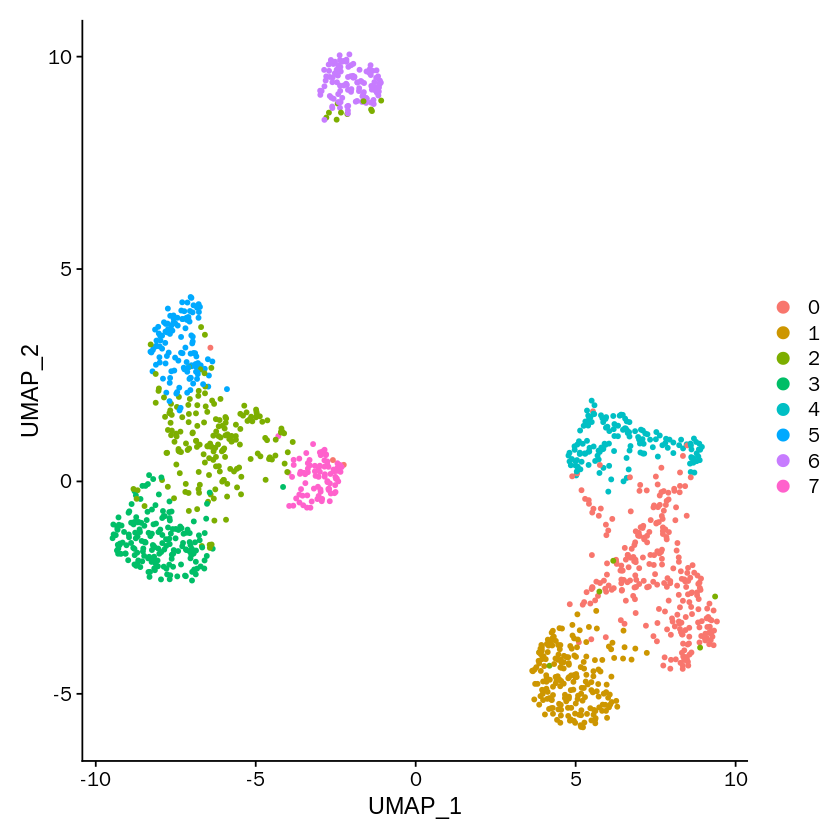

In [18]:
query_obj <- CreateSeuratObject(counts = query_data, min.cells=5)
query_obj <- NormalizeData(query_obj, normalization.method = "LogNormalize", scale.factor = 10000)
query_obj <- FindVariableFeatures(query_obj, selection.method = "vst")
all.genes <- rownames(query_obj)
query_obj <- ScaleData(query_obj, features = all.genes)
query_obj <- RunPCA(query_obj, features = VariableFeatures(query_obj))
query_obj <- FindNeighbors(query_obj)
query_obj <- FindClusters(query_obj, resolution = 0.5)
query_obj <- RunUMAP(query_obj, dims=1:10)
DimPlot(query_obj, reduction = "umap")

**Running scCATCH**

\# Step 1: Finding markers for clusters

Please change "species" as either "Human" or "Mouse".

All other parameters are set as the same in official tutorial (https://github.com/ZJUFanLab/scCATCH).

In [12]:
clu_markers <- findmarkergenes(object = query_obj,
                               species = 'Human',
                               cluster = 'All',
                               match_CellMatch = FALSE,
                               cancer = NULL,
                               tissue = NULL,
                               cell_min_pct = 0.25,
                               logfc = 0.25,
                               pvalue = 0.05)

Note: the raw data matrix includes 1308 cells and 10927 genes. 

---Revising gene symbols according to NCBI Gene symbols (updated in Jan. 10, 2020, https://www.ncbi.nlm.nih.gov/gene) and no matched genes and duplicated genes will be removed. 

Note: the new data matrix includes 1308 cells and 10586 genes. 

Finding potential marker genes for cluster 0 
***Done*** 
Finding potential marker genes for cluster 1 
***Done*** 
Finding potential marker genes for cluster 2 
***Done*** 
Finding potential marker genes for cluster 3 
***Done*** 
Finding potential marker genes for cluster 4 
***Done*** 
Finding potential marker genes for cluster 5 
***Done*** 
Finding potential marker genes for cluster 6 
***Done*** 
Finding potential marker genes for cluster 7 
***Done*** 


\# Step 2: Annotating cell types

Please specify the tissue using the name in official tutorial (https://github.com/ZJUFanLab/scCATCH).

In [13]:
clu_ann <- scCATCH(object = clu_markers$clu_markers,
                   species = 'Human',
                   cancer = NULL,
                   tissue = 'Heart')



Beginning evidence-based scoring and annotation 
***Done*** 


**Generate cell-specific labels**

In [27]:
cell.ident <- as.numeric(query_obj@active.ident)
query_type <- as.numeric(query_obj@active.ident)
for (i in c(1:length(query_type))){
    query_type[i] <- clu_ann$cell_type[cell.ident[i]]
}

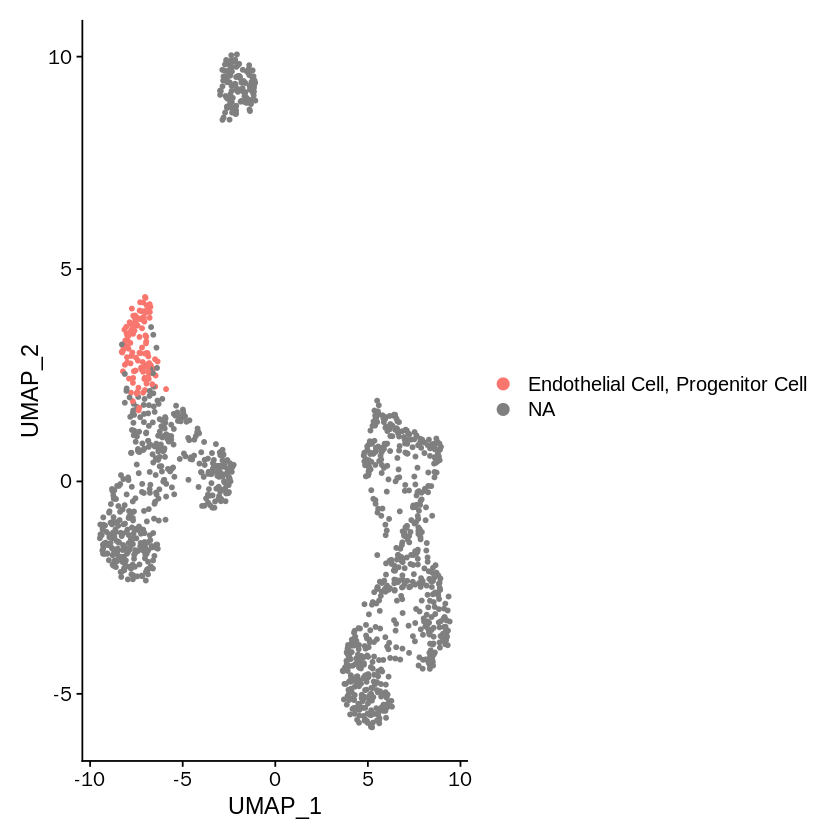

In [31]:
# Visualize
query_obj@active.ident <- as.factor(query_type)
DimPlot(query_obj, reduction = "umap")

**Save annotated results**

Remember to change the "save_anno_dir" to your directory.

In [28]:
query_result <- data.frame(cell_type=query_type)
rownames(query_result) <- colnames(query_data)

In [ ]:
save_anno_dir <- "/data1/ljq/rdata/cell_type/"
write.csv(query_result, paste0(save_anno_dir, "anno.csv"))